<a href="https://www.kaggle.com/code/koheimuramatsu/toxic-text-detection-using-bert-finetuning?scriptVersionId=177178313" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h2 style="text-align:center;font-size:200%;">
    <b>Toxic Text Detection using BERT</b>
</h2>
<h3  style="text-align:center;">Keywords : 
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">NLP</span>
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">EDA</span>
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">Text Mining</span>
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">PyTorch</span>
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">BERT</span>
</h3>

<hr>

<a id='top'></a>
<h2 style="font-size:150%;"><span id='top'>Table of Contents</span></h2>
<blockquote>
    <ol>
        <li><a href="#Overview">Overview</a></li>
        <li><a href="#Preparation">Preparation</a></li>
        <li><a href="#Data-Load">Data Load</a></li>
        <li><a href="#Pre-Processing">Pre-Processing</a></li>
        <li><a href="#EDA">EDA</a></li>
        <ul>
            <li><a href="#Sincere/Insincere-Distribution">Sincere/Insincere Distribution</a></li>
            <li><a href="#Word-Length-Distribution">Word Length Distribution</a></li>
            <li><a href="#Sentence-Distribution">Sentence Distribution</a></li>
            <li><a href="#Punctuation-Distribution">Punctuation Distribution</a></li>
            <li><a href="#Word-Frequencies">Word Frequencies</a></li>
            <li><a href="#WordCloud">WordCloud</a></li>
        </ul>
        <li><a href="#Modeling">Modeling</a></li>
        <ul>
            <li><a href="#Model-Settings">Model Settings</a></li>
            <li><a href="#Data-Preparation">Data Preparation</a></li>
            <li><a href="#Training">Training</a></li>
            <li><a href="#Evaluation">Evaluation</a></li>
        </ul>
        <li><a href="#Modeling2">Modeling2</a></li>
        <ul>
            <li><a href="#Load-Dataset-from-Pandas">Load Dataset from Pandas</a></li>
            <li><a href="#Tokenize">Tokenize</a></li>
            <li><a href="#Batch-Setting">Batch Setting</a></li>
            <li><a href="#Model-Setting">Model Setting</a></li>
            <li><a href="#LoRA">LoRA</a></li>
            <li><a href="#Evaluation">Evaluation</a></li>
        </ul>
        <li><a href="#Conclusion">Conclusion</a></li>
        <li><a href="#References">References</a></li>
        <li><a href="#Submission">Submission</a></li>
    </ol>
</blockquote>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Overview</div>
## About the Dataset
- Questions in [Quora](https://www.quora.com/)
- Questions is classified in sincere or not
    - characteristics of <b>insincere</b> questions are:
        - Has a non-neutral tone
        - Is disparaging or inflammatory
        - Isn't grounded in reality
        - Uses sexual content (incest, bestiality, pedophilia) for shock value, and not to seek genuine answers
        
## What You Get from this Notebook
- ETL technique
- EDA & Visualization
- Classification Modeling using Pytorch
    - By building a model that can detect insincere questions, we can save time and effort in the operation of Quora and help maintain a safer speech space.

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Preparation</div>

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
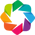

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 80)
import os
import matplotlib.pyplot as plt
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
import string

import collections
import itertools
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import spacy
from wordcloud import WordCloud
from PIL import Image
import requests
import io
from tqdm import tqdm
tqdm.pandas()

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Data Load</div>

In [5]:
data_dir = "/kaggle/input"

In [8]:
for dirname, _, filenames in os.walk(f"{data_dir}/quora-insincere-questions-classification"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/quora-insincere-questions-classification/sample_submission.csv
/kaggle/input/quora-insincere-questions-classification/embeddings.zip
/kaggle/input/quora-insincere-questions-classification/train.csv
/kaggle/input/quora-insincere-questions-classification/test.csv


In [9]:
train = pd.read_csv(f"{data_dir}/quora-insincere-questions-classification/train.csv")
print('Train Set Shape = {}'.format(train.shape))
train.head(3)

Train Set Shape = (1306122, 3)


qid  \
0  00002165364db923c7e6   
1  000032939017120e6e44   
2  0000412ca6e4628ce2cf   

                                                                     question_text  \
0         How did Quebec nationalists see their province as a nation in the 1960s?   
1  Do you have an adopted dog, how would you encourage people to adopt and not ...   
2              Why does velocity affect time? Does velocity affect space geometry?   

   target  
0       0  
1       0  
2       0

In [10]:
test = pd.read_csv(f"{data_dir}/quora-insincere-questions-classification/test.csv")
print('Test Set Shape = {}'.format(test.shape))
test.head(3)

Test Set Shape = (375806, 2)


qid  \
0  0000163e3ea7c7a74cd7   
1  00002bd4fb5d505b9161   
2  00007756b4a147d2b0b3   

                                                                     question_text  
0  Why do so many women become so rude and arrogant when they get just a little...  
1  When should I apply for RV college of engineering and BMS college of enginee...  
2                               What is it really like to be a nurse practitioner?

In [8]:
submission = pd.read_csv(f"{data_dir}/quora-insincere-questions-classification/sample_submission.csv")
submission.head(3)

qid  prediction
0  0000163e3ea7c7a74cd7           0
1  00002bd4fb5d505b9161           0
2  00007756b4a147d2b0b3           0

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Pre-Processing</div>

## Count Words

In [10]:
train["word_num"] = train["question_text"].apply(lambda x: len(x.split()))

## Count Punctuations

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
train["punc_list"] = train["question_text"].apply(lambda x: [i for i in x if i in string.punctuation] )

In [14]:
train["punc_cnt"] = train["punc_list"].apply(lambda x: len(x))

## Text Processing

In [20]:
# stopwords_en = stopwords.words("english")
# nlp = spacy.load('en_core_web_sm') #en_core_web_lg
def en_preprocess(text):
    lowered = text.lower()
#     tokenized = []
#     for i in nlp(lowered):
#         word = i.lemma_
#         pos = i.pos_
#         if i.is_alpha and pos not in ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE'] and i.text not in stopwords_en:
#             tokenized.append(word)
#     preprocessed = " ".join(tokenized)
    return lowered

In [ ]:
train["text_preproc"] = train["question_text"].progress_apply(lambda x: en_preprocess(x))

## Get Mean Word Length

In [ ]:
train["mean_word_len"] = train["text_preproc"].progress_apply(lambda x: np.mean([len(i) for i in x.split()]) )

## Get Sentence Length

In [ ]:
train["sentence_len"] = train["question_text"].progress_apply(lambda x: len(x))

In [11]:
# train.to_csv(f"{data_dir}/quora_train.csv",index=False)
train = pd.read_csv(f"/kaggle/input/quara-train/quora_train.csv") # Load Pre-Processed dataframe
train.head()

qid  \
0  00002165364db923c7e6   
1  000032939017120e6e44   
2  0000412ca6e4628ce2cf   
3  000042bf85aa498cd78e   
4  0000455dfa3e01eae3af   

                                                                     question_text  \
0         How did Quebec nationalists see their province as a nation in the 1960s?   
1  Do you have an adopted dog, how would you encourage people to adopt and not ...   
2              Why does velocity affect time? Does velocity affect space geometry?   
3                        How did Otto von Guericke used the Magdeburg hemispheres?   
4    Can I convert montra helicon D to a mountain bike by just changing the tyres?   

   target  word_num                                         text_preproc  \
0       0        13               quebec nationalist see province nation   
1       0        16        adopted dog would encourage people adopt shop   
2       0        10  velocity affect time velocity affect space geometry   
3       0         9           otto von guericke use magdeburg hemisphere   
4       0        15     convert montra helicon mountain bike change tyre   

   punc_cnt  mean_word_len   punc_list  sentence_len  
0         1       6.800000       ['?']            72  
1         2       5.571429  [',', '?']            81  
2         2       6.428571  ['?', '?']            67  
3         1       6.166667       ['?']            57  
4         1       6.000000       ['?']            77

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">EDA</div>

## Sincere/Insincere Distribution
The majority of the questions are sincere.

In [26]:
hv.Bars( train.target.value_counts(normalize=True).to_frame().rename(index={0:"sincere",1:"insincere"})*100 )\
.opts(xlabel="Target",ylabel="Count",yformatter="%d%%", \
      width=400,height=300,title="Sincere / Insincere Counts",tools=['hover'],fontsize={'xticks': 10})

:Bars   [index]   (target)

### Question Examples

<b>Sincere Questions</b>

In [27]:
for i in train[train.target==0].question_text.values[0:5]:
    print(f"- {i}")

- How did Quebec nationalists see their province as a nation in the 1960s?
- Do you have an adopted dog, how would you encourage people to adopt and not shop?
- Why does velocity affect time? Does velocity affect space geometry?
- How did Otto von Guericke used the Magdeburg hemispheres?
- Can I convert montra helicon D to a mountain bike by just changing the tyres?


<b>Insincere Questions</b>

In [28]:
for i in train[train.target==1].question_text.values[0:5]:
    print(f"- {i}")

- Has the United States become the largest dictatorship in the world?
- Which babies are more sweeter to their parents? Dark skin babies or light skin babies?
- If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?
- I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?
- Which races have the smallest penis?


## Word Length Distribution
Sincere questions tend to use longer words.

In [29]:
_sin_mean = np.round(train[train.target==0].mean_word_len.mean(),2)
_insin_mean = np.round(train[train.target==1].mean_word_len.mean(),2)
d = train[["target","mean_word_len"]].copy()
d.target.replace({0:"sincere", 1:"insincere"},inplace=True)
g = hv.BoxWhisker(d, kdims=["target"], vdims='mean_word_len')\
    * hv.Text("sincere", 35, f"Avg: {_sin_mean}") * hv.Text("insincere", 35, f"Avg: {_insin_mean}")
g.opts(opts.BoxWhisker(title="Sincere / Insincere Words Length", xlabel="",ylabel="Length",\
    width=400, height=300,tools=['hover'],fontsize={'xticks': 10}))

:Overlay
   .BoxWhisker.I :BoxWhisker   [target]   (mean_word_len)
   .Text.I       :Text   [x,y]
   .Text.II      :Text   [x,y]

## Sentence Distribution

In [30]:
_sin_mean = np.round(train[train.target==0].sentence_len.mean(),2)
_insin_mean = np.round(train[train.target==1].sentence_len.mean(),2)
d = train[["target","sentence_len"]].copy()
d.target.replace({0:"sincere", 1:"insincere"},inplace=True)
g = hv.BoxWhisker(d, kdims=["target"], vdims='sentence_len')\
    * hv.Text("sincere", 600, f"Avg: {_sin_mean}") * hv.Text("insincere", 600, f"Avg: {_insin_mean}")
g.opts(opts.BoxWhisker(title="Sincere / Insincere Sentence Length", xlabel="",ylabel="Length",\
    width=400, height=300,tools=['hover'],fontsize={'xticks': 10}))

:Overlay
   .BoxWhisker.I :BoxWhisker   [target]   (sentence_len)
   .Text.I       :Text   [x,y]
   .Text.II      :Text   [x,y]

## Punctuation Distribution

In [31]:
_sin_mean = np.round(train[train.target==0].punc_cnt.mean(),2)
_insin_mean = np.round(train[train.target==1].punc_cnt.mean(),2)
d = train[["target","punc_cnt"]].copy()
d.target.replace({0:"sincere", 1:"insincere"},inplace=True)
g = hv.BoxWhisker(d, kdims=["target"], vdims='punc_cnt')\
    * hv.Text("sincere", 250, f"Avg: {_sin_mean}") * hv.Text("insincere", 250, f"Avg: {_insin_mean}")
g.opts(opts.BoxWhisker(title="Sincere / Insincere Punctuations Count", xlabel="",ylabel="Count",\
    width=400, height=300,tools=['hover'],fontsize={'xticks': 10}))

:Overlay
   .BoxWhisker.I :BoxWhisker   [target]   (punc_cnt)
   .Text.I       :Text   [x,y]
   .Text.II      :Text   [x,y]

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

## Word Frequencies

In [32]:
_sincere = train[train.target==0].dropna()
_insincere = train[train.target==1].dropna()

In [33]:
def ngram_func(ngram, text_series):
    # string_filterd =  text_series.sum().split()
    string_filterd =  " ".join(text_series).split()
    dic = nltk.FreqDist(nltk.ngrams(string_filterd, ngram)).most_common(30)
    ngram_df = pd.DataFrame(dic, columns=['ngram','count'])
    ngram_df.index = [' '.join(i) for i in ngram_df.ngram]
    ngram_df.drop('ngram',axis=1, inplace=True)
    return ngram_df

### Unigram
<b>The insincere questions are more likely to be political, racial, and words about specific persons.</b>

In [34]:
d1 = ngram_func(1, _sincere["text_preproc"].values)
d2 = ngram_func(1, _insincere["text_preproc"].values)
g1 = hv.Bars(d1[0:20][::-1]).opts(title="Sincere Unigram - Top20")
g2 = hv.Bars(d2[0:20][::-1]).opts(title="Insincere Unigram - Top20", color="red")
(g1 + g2).opts(opts.Bars(xlabel="Unigram", ylabel="Count", width=400, height=400,tools=['hover'],\
    show_grid=True ,invert_axes=True,fontsize={'yticks': 9})).opts(shared_axes=False)

:Layout
   .Bars.I  :Bars   [index]   (count)
   .Bars.II :Bars   [index]   (count)

### Bigram

In [35]:
d1 = ngram_func(2, _sincere["text_preproc"].values)
d2 = ngram_func(2, _insincere["text_preproc"].values)
g1 = hv.Bars(d1[0:20][::-1]).opts(title="Sincere Bigram - Top20")
g2 = hv.Bars(d2[0:20][::-1]).opts(title="Insincere Bigram - Top20", color="red")
(g1 + g2).opts(opts.Bars(xlabel="Bigram", ylabel="Count", width=400, height=400,tools=['hover'],\
    show_grid=True ,invert_axes=True,fontsize={'yticks': 9})).opts(shared_axes=False)

:Layout
   .Bars.I  :Bars   [index]   (count)
   .Bars.II :Bars   [index]   (count)

### Punctuations
<b>It can be seen that insincere questions contain more exclamation marks ("!").</b>

In [36]:
_sin = collections.Counter(list(itertools.chain.from_iterable(_sincere.punc_list.values))).most_common(20)
_insin = collections.Counter(list(itertools.chain.from_iterable(_insincere.punc_list.values))).most_common(20)
_sin_punc = pd.DataFrame(_sin).rename(columns={0:"punc", 1:"cnt"}).set_index("punc")[::-1]
_sin_punc = ( _sin_punc/_sin_punc.sum() ) * 100
_insin_punc = pd.DataFrame(_insin).rename(columns={0:"punc", 1:"cnt"}).set_index("punc")[::-1]
_insin_punc = ( _insin_punc/_insin_punc.sum() ) * 100
g1 = hv.Bars( _sin_punc ).opts(title="Sincere Punctuations - Top20")
g2 = hv.Bars( _insin_punc ).opts(title="Insincere Punctuations - Top20", color="red")
(g1 + g2).opts(opts.Bars(xlabel="Punctuations", ylabel="Count", width=400, height=400,tools=['hover'],\
    show_grid=True ,invert_axes=True,fontsize={'yticks': 10})).opts(shared_axes=False)

:Layout
   .Bars.I  :Bars   [punc]   (cnt)
   .Bars.II :Bars   [punc]   (cnt)

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

## WordCloud

In [38]:
_sin_text = " ".join( _sincere["text_preproc"].values )
_insin_text = " ".join( _insincere["text_preproc"].values )
_image_url = "https://cdn-icons-png.flaticon.com/512/174/174865.png"

In [39]:
def wordcloud_mask(img_url, text, _title, _cmap):
    _img = io.BytesIO(requests.get(img_url).content)
    _mask_img = np.array(Image.open( _img ))
    wordcloud = WordCloud(background_color='white',width=800, height=600, \
        min_font_size=1, max_words=None, collocations=False, min_word_length=1,  \
        mask=_mask_img, contour_width =1, contour_color="#f5f5f5", colormap=_cmap)
    wordcloud.generate(text)
    plt.figure(figsize=(10, 10))
    plt.title(_title, fontsize=20)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

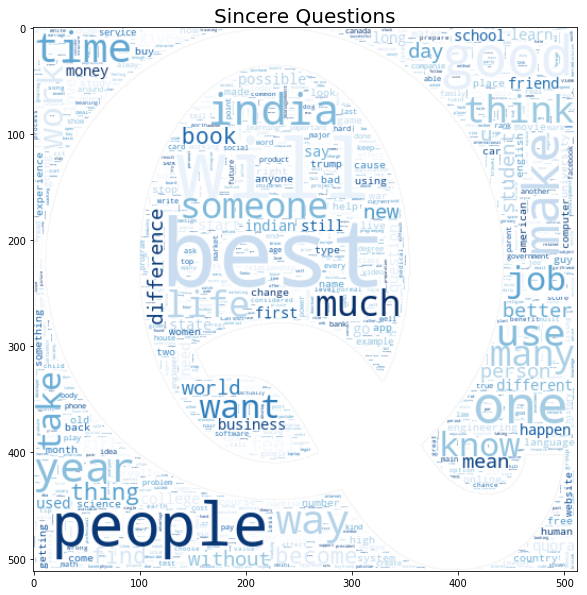

In [40]:
wordcloud_mask(_image_url, _sin_text, "Sincere Questions", "Blues")

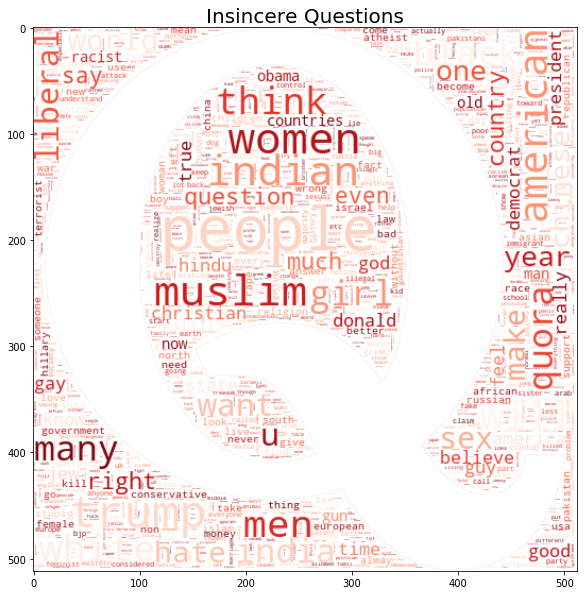

In [41]:
wordcloud_mask(_image_url, _insin_text, "Insincere Questions", "Reds")

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Modeling</div>

<b>This section is inspired by the source code of <a href="https://www.kaggle.com/code/lemonwaffle/quora-pytorch-torchtext">this notebook</a>. Thanks!</b>

Load the relevant pytorch libraries

In [88]:
! pip install transformers[ja,sentencepiece,torch] datasets  matplotlib peft wandb

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [156]:
from transformers import AutoTokenizer
from transformers import AutoModel
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from tqdm import tqdm
from sklearn.metrics import classification_report

## Data Preparation

In [157]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

define dataset class

In [158]:
class Data(Dataset):
    def __init__(self, data, tokenizer, max_length, test=False):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.test = test
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        text = self.data["question_text"].values[idx]
        encoded = tokenizer(
            text,
            padding = "max_length",
            max_length = self.max_length,
            truncation = True
        )
        qids = self.data["qid"].values[idx]
        input_ids = torch.tensor(encoded["input_ids"], dtype = torch.int32)
        attention_mask = torch.tensor(encoded["attention_mask"], dtype = torch.int32)
        token_type_ids = torch.tensor(encoded["token_type_ids"], dtype = torch.int32)
        
        if self.test:
            return qids, input_ids, attention_mask, token_type_ids
        
        label = self.data["target"].values[idx]
        label = torch.tensor(label, dtype = torch.int32)
        return qids, input_ids, attention_mask, token_type_ids, label

- make dataset  
- this time, training dataset is too large (and time-consuming) to try out some training process, so I used only top-**10000** dataset for train/valid.

In [159]:
MAX_LEN = 256
train_data, valid_data = train_test_split(train[:10000], train_size=0.7)
train_ds = Data(train_data, tokenizer, MAX_LEN)
valid_ds = Data(valid_data, tokenizer, MAX_LEN)
test_ds = Data(test, tokenizer, MAX_LEN, test=True)

make dataloader

In [160]:
BATCH_SIZE = 50
train_dl = DataLoader(train_ds, batch_size = BATCH_SIZE, shuffle = True, drop_last = True, num_workers=os.cpu_count(), pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size = BATCH_SIZE, shuffle = False, drop_last = False, num_workers=os.cpu_count(), pin_memory=True)
test_dl = DataLoader(test_ds, batch_size = BATCH_SIZE, shuffle = False, drop_last = False, num_workers=os.cpu_count(), pin_memory=True)

example output

In [17]:
next(iter(train_dl)) # qid, input_ids, attention_mask , token_type_ids , label

[['00d8f5d9f6c1da8b764d',
  '0063ea3162cc2a5dfadb',
  '0089e7914ec5a83fbda3',
  '00b8ae5b9c874227bf5f',
  '00850511ddac1f702e01',
  '00f9c7529ad9a54c9dc1',
  '005a72c4beed70846190',
  '000df7b9f388107d520a',
  '0015a7fe295bf3aa5e97',
  '01b94168b638f9131976',
  '009ccfe9a0582fcdd323',
  '011462ed4d7f8db2fea0',
  '00c50263be60e306eec8',
  '00517fc88ef7a56eedc8',
  '01e2c9759e68a0e8304d',
  '00686e18b18295ea91b4',
  '00b8512bab7f76fde4c6',
  '01acb47c2af004d14b1f',
  '009460f7c596e8135efd',
  '00ddd2c2fda679d14b07',
  '01112d5064d5d16c31f0',
  '0074fd995500fa58a416',
  '00f1a06ea64e0e887428',
  '00ddbb48e9fccf8eb0fc',
  '019e47c02464d3508bbf',
  '004d7d0bf697c89f54d5',
  '0029ad686abc23ada02e',
  '00d4e34932a982bb1216',
  '006cc1ed81577466ef11',
  '0016b2263ebbe71b2d38',
  '003fd98a13b1632e7703',
  '013817f5b0dd3157cd2a',
  '00b75ba412ac8dacbeb3',
  '01d70df544c0217f4c9a',
  '012e3d4736e81a6a92b9',
  '01bce9d261b504eb6700',
  '015dd3653dad5b14122a',
  '006b671e7f84d7936575',
  '0181f3038

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

## Training

### Model

In [161]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.bert = AutoModel.from_pretrained("bert-base-uncased")
        self.dropout = nn.Dropout(p=0.2)
        
        self.fc1 = nn.Linear(in_features = 768, out_features = 512)
        self.fc2 = nn.Linear(in_features = 512, out_features = 2)
    
    def forward(self, input_ids, attention_mask, token_type_ids):
        x = self.bert(
            input_ids = input_ids, attention_mask = attention_mask, token_type_ids = token_type_ids
        )
        x = self.fc1(self.dropout(x.pooler_output))
        x = self.fc2(x).squeeze(-1)
        return x

model = Model().cuda()

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

### Run

define early-stopping function

In [162]:
class EarlyStopping:
    def __init__(self, tolerance=5, min_delta=0):

        self.tolerance = tolerance
        self.min_delta = min_delta
        self.counter = 0
        self.stop = False

    def __call__(self, train_loss, validation_loss):
        if (validation_loss - train_loss) > self.min_delta:
            self.counter +=1
            if self.counter >= self.tolerance:  
                self.stop = True

In [163]:
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-5)
criterion =  nn.CrossEntropyLoss()
early_stopping = EarlyStopping(tolerance=3, min_delta=0.1)

In [164]:
best_loss = np.inf
EPOCHS = 2

for epoch in range(EPOCHS):
    print(f"EPOCH[{epoch}]")
    
    model.train()
    train_loss = 0
    for batch in tqdm(train_dl):
        optimizer.zero_grad()
        input_ids, attention_mask, token_type_ids, label = batch[1].cuda(), batch[2].cuda(), batch[3].cuda(), batch[4].long().cuda()
        preds = model(input_ids, attention_mask, token_type_ids)
        loss = criterion(preds, label)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_dl)

    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for batch in tqdm(valid_dl):
            input_ids, attention_mask, token_type_ids, label = batch[1].cuda(), batch[2].cuda(), batch[3].cuda(), batch[4].long().cuda()
            preds = model(input_ids, attention_mask, token_type_ids)
            loss = criterion(preds, label)
            valid_loss += loss.item()
        valid_loss /= len(valid_dl)
    
    print(f"TRAIN LOSS: {train_loss}")
    print(f"VALID LOSS: {valid_loss}")
    
    early_stopping(train_loss, valid_loss)
    if early_stopping.stop:
        print(f"Early Stopped at epoch:{epoch}")
        break
    
    if valid_loss < best_loss:
        best_loss = valid_loss

print(f"### BEST LOSS: {best_loss} ###")

EPOCH[0]


  0%|          | 0/140 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(tru

TRAIN LOSS: 0.21559743062992182
VALID LOSS: 0.137859419050316
EPOCH[1]


  0%|          | 0/140 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(tru

TRAIN LOSS: 0.11535738409895982
VALID LOSS: 0.1291950974613428
### BEST LOSS: 0.1291950974613428 ###


## Evaluation

In [165]:
pred1 = []
model.eval()
with torch.no_grad():
    for batch in tqdm(valid_dl):
        input_ids, attention_mask, token_type_ids = batch[1].cuda(), batch[2].cuda(), batch[3].cuda()
        logits = model(input_ids, attention_mask, token_type_ids).cpu().numpy()
        pred1.extend(logits.argmax(axis = 1))

  0%|          | 0/60 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true

In [166]:
truth = valid_data["target"].values
print(classification_report(truth, pred1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2812
           1       0.59      0.54      0.56       188

    accuracy                           0.95      3000
   macro avg       0.78      0.76      0.77      3000
weighted avg       0.95      0.95      0.95      3000



<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Modeling2</div>

In [167]:
from transformers import pipeline
from transformers import AutoTokenizer
from transformers.trainer_utils import set_seed
set_seed(42)
from transformers import BatchEncoding
from transformers import DataCollatorWithPadding
from transformers import TrainingArguments
from transformers import Trainer
from transformers import AutoModelForSequenceClassification
import numpy as np
import peft
from datasets import DatasetDict
from datasets import Dataset
os.environ["WANDB_DISABLED"] = "true"

In [202]:
train_data, valid_data = train_test_split(train[:30000], train_size=0.7, stratify=train[:30000]['target'])

In [203]:
train_data.head()

qid  \
17788  037ba11f633f224edc72   
5017   00f94789d873d1ab37d6   
10706  0218fbddc1505fc9a64d   
23764  04a7beea7b4e7025dbf1   
17367  03677b7eb931edea3a1e   

                                                                         question_text  \
17788          How can I ship something I am sending for charity internationally free?   
5017   How, on a Facebook page, when tagging products in a post, can I get the unit...   
10706                                                    How can I create commercials?   
23764  What are some useful tips for someone who is starting work at Essex property...   
17367  How do I develop an iPhone application for recording incoming and outgoing c...   

       target  word_num  \
17788       0        12   
5017        0        24   
10706       0         5   
23764       0        15   
17367       0        13   

                                                   text_preproc  punc_cnt  \
17788                                    ship send charity free         1   
5017   facebook page tag product post get unit display kg price         8   
10706                                         create commercial         1   
23764                useful tip start work essex property trust         1   
17367  develop iphone application record incoming outgoing call         1   

       mean_word_len                                 punc_list  sentence_len  
17788       4.750000                                     ['?']            71  
5017        4.700000  [',', ',', ',', '(', '.', '.', ')', '?']           119  
10706       8.000000                                     ['?']            29  
23764       5.142857                                     ['?']            83  
17367       7.142857                                     ['?']            81

## Load Dataset from Pandas

In [205]:
train_dataset = Dataset.from_pandas(train_data[["question_text","target"]])
valid_dataset = Dataset.from_pandas(valid_data[["question_text","target"]])

## Tokenize

In [206]:
model_name = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"  #"bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [207]:
def text_tokenizer( inputs: dict[str, str | int] ) -> BatchEncoding:
    encoded_inputs = tokenizer(inputs["question_text"], max_length=512)
    encoded_inputs["labels"] = inputs["target"]
    return encoded_inputs

In [208]:
encoded_train_dataset = train_dataset.map(
    text_tokenizer,
    remove_columns=train_dataset.column_names,
)
encoded_valid_dataset = valid_dataset.map(
    text_tokenizer,
    remove_columns=valid_dataset.column_names,
)

Map:   0%|          | 0/21000 [00:00<?, ? examples/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Map:   0%|          | 0/9000 [00:00<?, ? examples/s]

In [42]:
encoded_train_dataset[0]

{'input_ids': [101, 2054, 3310, 2320, 1999, 1037, 2095, 1029, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1], 'labels': 0}

In [43]:
tokenizer.convert_ids_to_tokens(encoded_train_dataset[0]['input_ids'])

['[CLS]', 'what', 'comes', 'once', 'in', 'a', 'year', '?', '[SEP]']

## Batch Setting

In [209]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

## Model Setting

In [210]:
label2id = { "0":0 ,"1":1  }
id2label = { 0:"0", 1:"1" }
base_model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,
    label2id=label2id,
    id2label=id2label
)

## LoRA

In [211]:
peft_config = peft.LoraConfig(
    task_type=peft.TaskType.SEQ_CLS, 
    r=8, 
    lora_alpha=32, 
    lora_dropout=0.1, 
    inference_mode=False,
    target_modules = "all-linear"
)
lora_model = peft.get_peft_model(base_model, peft_config)

In [212]:
lora_model.print_trainable_parameters()

trainable params: 1,274,130 || all params: 68,247,588 || trainable%: 1.8669231211511828


In [217]:
training_args = TrainingArguments(
    output_dir="./outputs",
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    learning_rate=5e-5,
    lr_scheduler_type="linear",
    warmup_ratio=0.1,
    num_train_epochs=3,
    save_strategy="epoch",
    logging_strategy="epoch",
    evaluation_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    fp16=True,
    report_to='none',
)

In [218]:
def compute_accuracy(
    eval_pred: tuple[np.ndarray, np.ndarray]
) -> dict[str, float]:
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    f1 = f1_score(labels, predictions, average='macro')

    return {"accuracy": (predictions == labels).mean(), "f1":f1 }

In [219]:
trainer = Trainer(
    model=lora_model,
    train_dataset=encoded_train_dataset,
    eval_dataset=encoded_valid_dataset,
    data_collator=data_collator,
    args=training_args,
    compute_metrics=compute_accuracy,
)
trainer.train()

/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


TrainOutput(global_step=495, training_loss=0.13779894896227904, metrics={'train_runtime': 195.373, 'train_samples_per_second': 322.46, 'train_steps_per_second': 2.534, 'total_flos': 925509331356480.0, 'train_loss': 0.13779894896227904, 'epoch': 3.0})

## Evaluation

In [220]:
trainer.evaluate(encoded_valid_dataset)

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'eval_loss': 0.1288803368806839, 'eval_accuracy': 0.9492222222222222, 'eval_f1': 0.7493086789115938, 'eval_runtime': 10.8053, 'eval_samples_per_second': 832.927, 'eval_steps_per_second': 6.571, 'epoch': 3.0}

In [221]:
text_cls = pipeline("text-classification", model=lora_model, tokenizer=tokenizer, return_all_scores=False)

/opt/conda/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
The model 'PeftModelForSequenceClassification' is not supported for text-classification. Supported models are ['AlbertForSequenceClassification', 'BartForSequenceClassification', 'BertForSequenceClassification', 'BigBirdForSequenceClassification', 'BigBirdPegasusForSequenceClassification', 'BioGptForSequenceClassification', 'BloomForSequenceClassification', 'CamembertForSequenceClassification', 'CanineForSequenceClassification', 'LlamaForSequenceClassification', 'ConvBertForSequenceClassification', 'CTRLForSequenceClassification', 'Data2VecTextForSequenceClassification', 'DebertaForSequenceClassification', 'DebertaV2ForSequenceClassification', 'DistilBertForSequenceClassification', 'ElectraForS

In [222]:
def prediction(text):
    predict_result = text_cls(text)[0]
    highest_score = predict_result
    return label2id[highest_score['label']]

In [223]:
valid_data["pred"] = valid_data['question_text'].progress_apply(lambda x: prediction(x) )

100%|██████████| 9000/9000 [09:58<00:00, 15.03it/s]


In [224]:
truth = valid_data["target"].values
pred2 = valid_data["pred"].values
print(classification_report(truth, pred2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8436
           1       0.63      0.45      0.53       564

    accuracy                           0.95      9000
   macro avg       0.80      0.72      0.75      9000
weighted avg       0.94      0.95      0.95      9000



# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Conclusion</div>

<div class="alert alert-success" role="alert" style="border-radius:10px">
<ul>
    <li>From the EDA, we found certain trends in insincere questions.</li>
    <ul>
        <li>words length</li>
        <li>sentence length</li>
        <li>punctuation usage</li>
        <li>words usage</li>
    </ul>
    <li>The classification model by pytorch enables the detection of insincere questions with a certain degree of accuracy</li>
    <li>Fine-tuned lightweight LLM models were also achieved with a good degree of accuracy.</li>
</ul>
</div>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">References</div>
- refenreced notebooks
    - EDA
        - https://www.kaggle.com/code/aryanml007/quora-insincere-eda-lstm-gru-embeddings
    
    - Modeling
        - https://www.kaggle.com/code/arnikaer/pytorch
        - https://www.kaggle.com/code/christofhenkel/how-to-preprocessing-when-using-embeddings
        - https://www.kaggle.com/code/lemonwaffle/quora-pytorch-torchtext
- Pytorch
    - https://pytorch.org/text/stable/index.html
    - https://pytorch.org/docs/stable/index.html
    - early stopping technique
        - https://stackoverflow.com/questions/71998978/early-stopping-in-pytorch
    - dataloader acceleration technique
        - https://qiita.com/sugulu_Ogawa_ISID/items/62f5f7adee083d96a587#11-num_workers
- Transformer based modeling
    - https://htomblog.com/python-bert
    - https://www.kaggle.com/code/bearmontblanc/nbme-pytorch-bert
    - bert output 
        - https://huggingface.co/docs/transformers/main_classes/output
    - how to explore in dataloader
        - https://output-zakki.com/dataloader_iter_and_next/
    - how to fine-tune
        - https://www.ai-shift.co.jp/techblog/2145
- Case study
    - https://techblog.yahoo.co.jp/entry/2021122030233811/
- HuggingFace
    - Pipieline
        - https://huggingface.co/docs/transformers/ja/main_classes/pipelines#transformers.TextClassificationPipeline
    - Load Dataset from Pandas
        - https://dev.classmethod.jp/articles/huggingface-usage-dataset/

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Submission</div>

submission process takes time, so I commented out submission code.

In [ ]:
# sub = []
# ids = []
# model.eval()
# with torch.no_grad():
#     for batch in tqdm(test_dl):
#         qid, input_ids, attention_mask, token_type_ids = batch[0], batch[1].cuda(), batch[2].cuda(), batch[3].cuda()
#         logits = model(input_ids, attention_mask, token_type_ids).cpu().numpy()
#         pred_labels = logits.argmax(axis = 1)
#         sub.extend(pred_labels)
#         ids.extend(qid)

In [ ]:
# submission = pd.DataFrame({'qid': ids, 'prediction': sub})
# submission.to_csv('/kaggle/working/submission.csv', index=False)

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>